# Case 1 - Coronary Heart Disease
Neural Networks for Health Technology Applications<br>
02.02.2020, Augustine Igbinidu-Uwuigbe & Mai Vu<br>
Metropolia University of Applied Sciences<br><br>

## Contents
<ol>
    <li>Background</li>
    <li>Data Analysis</li>
    <li>Models and Training</li>
    <li>Results</li>
    <li>Conclusions</li>
    <li>References</li>
</ol>

## 1. Background

<div style="text-align: justify">This report shows the process of handling the patients' heart condition data collected by Cleveland Clinic Foundation, V.A. Medical Center in CA, and University Hospital, Zurich in Switzerland. The goal is to classify the patients' heart disease based on available data with high accuracy using the neural network application provided by the TensorFlow library. To achieve that, it is important to deeply understand, carefully analyze the data to come up with appropriate neural network architectures. All data from the above institutions are combined into a bigger dataset which is examined as parts of data preprocessing before applying different neural network structures. The results of each model and conclusions are also mentioned in this report.<div>

## 2. Data Analysis and Normalization

In [74]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.preprocessing import MinMaxScaler

# Install TensorFlow
try:
    
  # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.__version__

'2.0.0'

In [75]:
#First, import necessary libraries for the whole process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [90]:
X = pd.read_csv('processed.cleveland.data',header = None,encoding = "ISO-8859-1",na_values=['?'])
col_rename = {0 : 'age', 1 : 'sex', 2 : 'cp', 3 : 'trestbps', 4 : 'chol', 5 : 'fbs', 6 : 'restecg', 7 : 'thalach', 
              8 : 'exang', 9 : 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}
X = X.rename(columns = col_rename)
print('Shape =', X.shape)
print('Number of NaN values =', X.isna().sum().sum())
X.sample(10) #take 10 random rows from X

Shape = (303, 14)
Number of NaN values = 6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
63,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
158,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
182,42.0,1.0,1.0,148.0,244.0,0.0,2.0,178.0,0.0,0.8,1.0,2.0,3.0,0
50,41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0,0
206,58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,3
250,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0
214,52.0,1.0,4.0,112.0,230.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,1
203,64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0,0
186,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0,0


The output shows a 2-dimension data frame whose shape is (303, 14), meaning there are 303 patients and 14 attributes. The table below is the explanation for each attributes.

|**No.**| **Name** | **Definition** |
|:--|:---------|:-----|
|1  | age      | age in years|
|2  | sex      | sex (1 = male; 0 = female) |
|3  | cp       | chest pain type (4 classes) |
|4  | trestbps | resting blood pressure (in mm Hg) |
|5  | chol     | serum cholestoral in mg/dl |
|6  | fbs      | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |
|7  | restecg  | resting electrocardiographic results (3 classes) |
|8  | thalach  | maximum heart rate achieved |
|9  | exang    | exercise induced angina (1 = yes; 0 = no) |
|10 | oldpeak  | ST depression induced by exercise relative to rest |
|11 | slope    | the slope of the peak exercise ST segment (3 classes) |
|12 | ca       | number of major vessels (0-3) colored by flourosopy |
|13 | thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect |
|14 | num      | diagnosis of heart disease |

<div style="text-align: justify">The goal is to predict the last attribute which can have any value from 0 (= absence) to 4. The output also includes 10 samples drawing from the dataset. Noted, the missing values (<b>?</b>) are replaced with <b>NaN</b> values. There are total 6 missing values in the Cleveland data (4 from the <b>ca</b> column and other 2 from the <b>thal</b> column which are classification attributes). Missing values are filled by the median of its column.</div>

In [91]:
X = X.fillna(X.median())
print('Number of NaN values =', X.isna().sum().sum())

Number of NaN values = 0


In [92]:
X.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000,303.000,303.000,303.00,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.439,0.680,3.158,131.69,246.693,0.149,0.990,149.607,0.327,1.040,1.601,0.663,4.723,0.937
std,9.039,0.467,0.960,17.60,51.777,0.356,0.995,22.875,0.470,1.161,0.616,0.934,1.938,1.229
min,29.000,0.000,1.000,94.00,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000,3.000,0.000
25%,48.000,0.000,3.000,120.00,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,3.000,0.000
50%,56.000,1.000,3.000,130.00,241.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000,3.000,0.000
75%,61.000,1.000,4.000,140.00,275.000,0.000,2.000,166.000,1.000,1.600,2.000,1.000,7.000,2.000
max,77.000,1.000,4.000,200.00,564.000,1.000,2.000,202.000,1.000,6.200,3.000,3.000,7.000,4.000


In [230]:
#converting file to pandas Dataframe for easy data manipulation
pf = pd.DataFrame(X)
pd.set_option('display.max_rows', 500) #Display more rows in DataFrame
pd.options.display.max_rows


500

In [94]:
c = pf.drop(columns=['sex','fbs','restecg','exang']) # Drop unwanted columns
c

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,num
0,63.0,1.0,145.0,233.0,150.0,2.3,3.0,0.0,6.0,0
1,67.0,4.0,160.0,286.0,108.0,1.5,2.0,3.0,3.0,2
2,67.0,4.0,120.0,229.0,129.0,2.6,2.0,2.0,7.0,1
3,37.0,3.0,130.0,250.0,187.0,3.5,3.0,0.0,3.0,0
4,41.0,2.0,130.0,204.0,172.0,1.4,1.0,0.0,3.0,0
5,56.0,2.0,120.0,236.0,178.0,0.8,1.0,0.0,3.0,0
6,62.0,4.0,140.0,268.0,160.0,3.6,3.0,2.0,3.0,3
7,57.0,4.0,120.0,354.0,163.0,0.6,1.0,0.0,3.0,0
8,63.0,4.0,130.0,254.0,147.0,1.4,2.0,1.0,7.0,2
9,53.0,4.0,140.0,203.0,155.0,3.1,3.0,0.0,7.0,1


In [95]:
#Defining x_label and y_label
x = c.loc[:,'age':'thal']
y = 1*(c.loc[:, 'num']) > 0

In [214]:
print(x.shape,y.shape)

(303, 9) (303,)


In [215]:
#Dividing data to 3 parts.(train_data,validation_data and test_data)
x_train = x.loc[0:149,:]
x_test = x.loc[250:,:]
x_val = x.loc[150:250,:]
y_train = y.loc[0:149]
y_test = y.loc[250:]
y_val = y.loc[150:250]

In [216]:
x_train_minmax.shape

(150, 9)

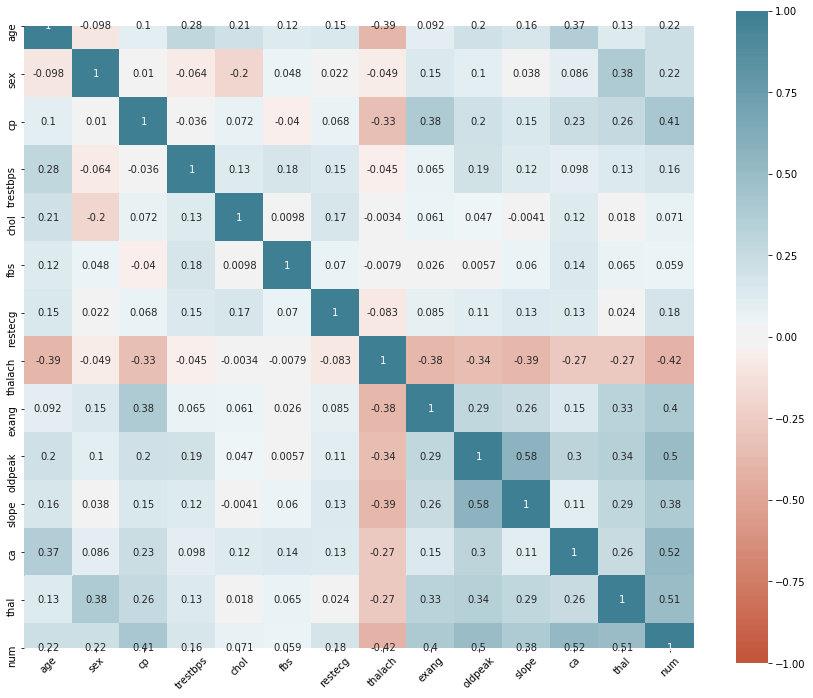

In [217]:
plt.figure(figsize = (15,12))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap=sns.diverging_palette(20, 220, n = 200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
);

In [218]:
print('Occurrences of the last attribute:\n' + str(X['num'].value_counts()))

Occurrences of the last attribute:
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


The above statistics show some basic information about the dataset such as predicted attribute does not have a strong linear related to any others and its occurrences are a little bit unevenly distributed.
Before using TensorFlow for the neural network, the dataset needs to be split into the training set, validation test and the test set, from which are divided further to separate the features and the labels. Also, it is important to normalize the datasets to draw all variables to the same range and set them to array for Tensorflow to work.

In [219]:
#Normalizing the DataFrame
x_train = np.array(x_train)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_val_minmax = min_max_scaler.fit_transform(x_val)
x_test_minmax = min_max_scaler.fit_transform(x_test)

## Model and Training

In [239]:
#Constructing desired model for the prediction
model = Sequential()
model.add(Dense(64, activation='sigmoid',
            input_shape=(x_train_minmax.shape[1],)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [240]:
#converting the normal arrays to numpy arrays
x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_train_minmax = np.asarray(x_train_minmax)
y_train = np.asarray(y_train)
x_val_minmax = np.asarray(x_val_minmax)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [241]:
values = model.fit(x_train_minmax, y_train, epochs=200,batch_size=1,verbose=1,validation_data = (x_val_minmax, y_val))

Train on 150 samples, validate on 101 samples
Epoch 1/200
150/150 [==============================] - 2s 10ms/sample - loss: 0.2844 - accuracy: 0.4533 - val_loss: 0.2576 - val_accuracy: 0.5545
Epoch 2/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.2362 - accuracy: 0.5867 - val_loss: 0.2083 - val_accuracy: 0.5941
Epoch 3/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1901 - accuracy: 0.7267 - val_loss: 0.2240 - val_accuracy: 0.5941
Epoch 4/200
150/150 [==============================] - 0s 3ms/sample - loss: 0.1469 - accuracy: 0.8400 - val_loss: 0.1711 - val_accuracy: 0.7426
Epoch 5/200
150/150 [==============================] - 0s 3ms/sample - loss: 0.1264 - accuracy: 0.8467 - val_loss: 0.1531 - val_accuracy: 0.7426
Epoch 6/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1209 - accuracy: 0.8333 - val_loss: 0.1528 - val_accuracy: 0.7426
Epoch 7/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1286

150/150 [==============================] - 0s 2ms/sample - loss: 0.1163 - accuracy: 0.8800 - val_loss: 0.1791 - val_accuracy: 0.7426
Epoch 57/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1209 - accuracy: 0.8600 - val_loss: 0.1543 - val_accuracy: 0.7822
Epoch 58/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1171 - accuracy: 0.8667 - val_loss: 0.1558 - val_accuracy: 0.7624
Epoch 59/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1136 - accuracy: 0.8600 - val_loss: 0.1545 - val_accuracy: 0.7624
Epoch 60/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1190 - accuracy: 0.8667 - val_loss: 0.1611 - val_accuracy: 0.7624
Epoch 61/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1176 - accuracy: 0.8600 - val_loss: 0.1640 - val_accuracy: 0.7624
Epoch 62/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1154 - accuracy: 0.8667 - val_loss: 0.1530 - val_accuracy

150/150 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.87 - 0s 2ms/sample - loss: 0.1116 - accuracy: 0.8733 - val_loss: 0.1524 - val_accuracy: 0.7822
Epoch 113/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1082 - accuracy: 0.8667 - val_loss: 0.1541 - val_accuracy: 0.7723
Epoch 114/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1101 - accuracy: 0.8733 - val_loss: 0.1585 - val_accuracy: 0.7624
Epoch 115/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1122 - accuracy: 0.8733 - val_loss: 0.1607 - val_accuracy: 0.7921
Epoch 116/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1129 - accuracy: 0.8667 - val_loss: 0.1629 - val_accuracy: 0.7921
Epoch 117/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1153 - accuracy: 0.8800 - val_loss: 0.1618 - val_accuracy: 0.7624
Epoch 118/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1117 - ac

150/150 [==============================] - 0s 2ms/sample - loss: 0.1056 - accuracy: 0.8867 - val_loss: 0.1544 - val_accuracy: 0.7822
Epoch 168/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1075 - accuracy: 0.8933 - val_loss: 0.1553 - val_accuracy: 0.7624
Epoch 169/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1075 - accuracy: 0.8800 - val_loss: 0.1538 - val_accuracy: 0.7624
Epoch 170/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1093 - accuracy: 0.8733 - val_loss: 0.1536 - val_accuracy: 0.7624
Epoch 171/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1107 - accuracy: 0.8667 - val_loss: 0.1562 - val_accuracy: 0.7624
Epoch 172/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1102 - accuracy: 0.8667 - val_loss: 0.1510 - val_accuracy: 0.7822
Epoch 173/200
150/150 [==============================] - 0s 2ms/sample - loss: 0.1095 - accuracy: 0.8667 - val_loss: 0.1565 - val_ac

In [244]:
import matplotlib.pyplot as plt

print(values.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Results

In [245]:
value = model.evaluate(x_test_minmax, y_test, batch_size=128) #testing the trained model on a seperate data(test_data)

53/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In the cell above we get an accuracy of 81.13% after training our model.

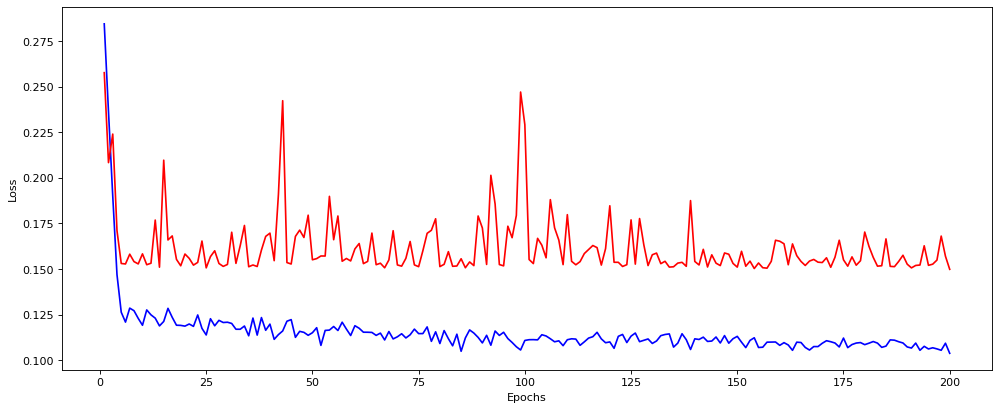

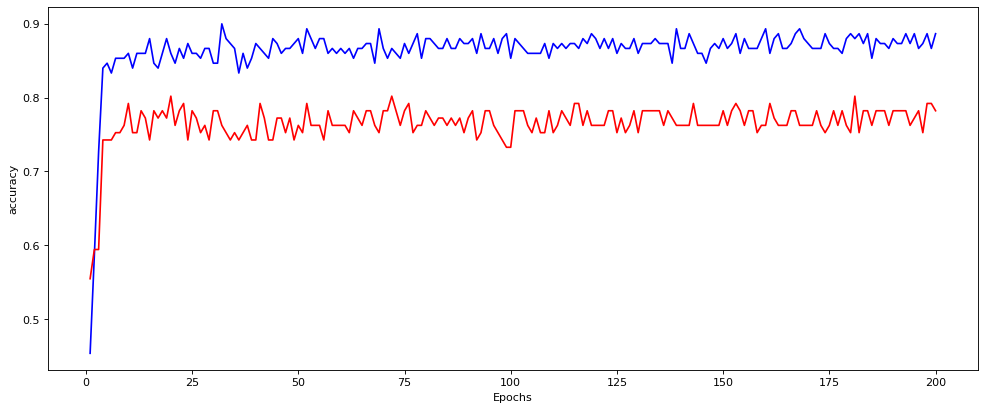

In [246]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
loss = values.history['loss']
val_loss = values.history['val_loss']
acc = values.history['accuracy']
val_acc = values.history['val_accuracy']

time = range(1,len(loss)+1)


plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time, acc, 'b-')
plt.plot(time, val_acc, 'r-')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

The graphs above illustrate the mean-squared-error and accuracy for the training_data and validation_data. The training_data is plotted with the blue marker while the other is plottedn with the red_marker. In both graphs the validation_data shows more fluctuations with the predicted values while the training_data seems to be more stable with the predicted values.

## 5. Conclusions

After continuous training of the model the accuracy there seemed to be an overfitting with the relu activation function, so the sigmoid function was used instead. 
Also, the accuracy of the model also increased after the number of layers was reduced to 2.
After training we test the model on the test_data and we achieved 81% accuracy. This accuracy was achieved with 200 epoch of training the model after which increasing the epoch made no difference.

## 6. References

<ol>
<li>John Sullivan. Data Cleaning with Python and Pandas: Detecting Missing Values; 2018.<br>
URL: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b</li>
<li>Mohammed Sunasra. Performance Metrics for Classification problems in Machine Learning; 2017<br>
URL: https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b</li>
<li></li>
</ol>